In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [10]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [3]:
class Timer:  #@save
    """记录多次运行时间"""

    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [11]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10186 sec'

In [12]:
timer = Timer()
d = a + b
f'{timer.stop():.5f} sec'

'0.00028 sec'

15.154262241479262

In [51]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [52]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [53]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([2.1183, 1.2548]) 
label: tensor([4.1545])


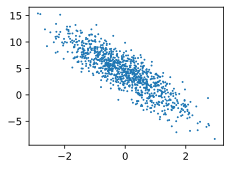

In [54]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [50]:
features.shape

torch.Size([1000, 2])

In [49]:
labels.shape

torch.Size([2000, 1])

In [77]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [121]:
for X, y in data_iter(10, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5898, -1.8303],
        [ 0.0739, -0.8894],
        [-0.3783,  0.2102],
        [ 1.1585,  0.4998],
        [-0.1266, -0.3204],
        [ 0.2348, -1.8643],
        [-0.0956,  0.4690],
        [ 0.0223, -0.2246],
        [-0.6258, -1.5692],
        [ 1.2079,  1.2656]]) 
 tensor([[11.6001],
        [ 7.3720],
        [ 2.7340],
        [ 4.8092],
        [ 5.0383],
        [11.0013],
        [ 2.4292],
        [ 5.0146],
        [ 8.2714],
        [ 2.3198]])


In [140]:
# w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [141]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [142]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [143]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [144]:
lr = 0.003
num_epochs = 3
net = linreg
loss = squared_loss

In [145]:
batch_size = 10
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 9.063553
epoch 2, loss 4.995314
epoch 3, loss 2.754052


In [112]:
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

w的估计误差:tensor([ 0.0004, -0.0002], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0002], grad_fn=<RsubBackward1>)


(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]]),
 tensor([0, 1, 2]),
 tensor([ 5, 14, 23, 32]))